In [10]:
import pandas as pd
import numpy as np
from lifelines.datasets import load_waltons

In [32]:
df = load_waltons();df.head(2)

T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137

In [12]:
T = df['T'] #duration
E = df['E'] #death 1 or censored 0

In [13]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [14]:
#kmf.survival_function_
#kmf.median_
kmf.plot()

In [18]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [20]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)
naf.plot()

Cumulative Hazard

In [35]:
# transform data formats to lifelines format
from lifelines.utils import datetimes_to_durations
start_date = ['2013-10-10 0:00:00', '2013-10-09', '2013-10-10']
end_date = ['2013-10-13', '2013-10-10', None]
T, E = datetimes_to_durations(start_date, end_date, fill_date='2013-10-15')
print('T (durations): ', T)
print('E (event_observed): ', E)

T (durations):  [ 3.  1.  5.]
E (event_observed):  [ True  True False]


https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html

In [43]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()
regression_dataset.head()

var1      var2      var3          T  E
0  0.595170  1.143472  1.571079  14.785479  1
1  0.209325  0.184677  0.356980   7.336734  1
2  0.693919  0.071893  0.557960   5.271527  1
3  0.443804  1.364646  0.374221  11.684168  1
4  1.613324  0.125566  1.921325   7.637764  1

In [45]:
from lifelines import CoxPHFitter
# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
#cph.print_summary()
cph.plot()

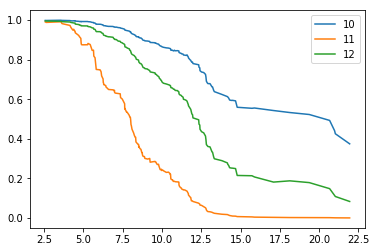

In [59]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:13]).plot()  # get the unique survival functions of two subjects

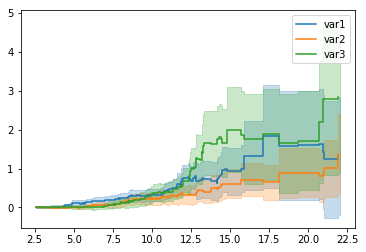

In [57]:
aaf.plot()

In [47]:
X.iloc[10:13]

var1      var2      var3
10  0.044280  0.305158  0.176480
11  1.035450  3.304733  0.997323
12  0.229195  0.581355  0.484794

In [97]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
import matplotlib.pyplot as plt

N = 25
current_time = 10
actual_lifetimes = np.array([[exponential(12), exponential(2)][uniform() < 0.5] for _ in range(N)])
observed_lifetimes = np.minimum(actual_lifetimes, current_time)
observed = actual_lifetimes < current_time

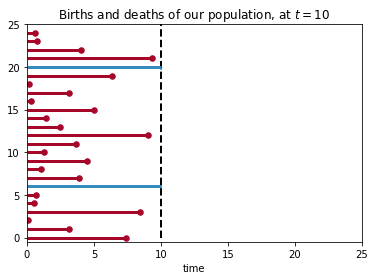

Observed lifetimes at time 10:
 [  0.62462899   0.77311723   4.0303714    9.35996553  10.           6.35104201
   0.14695762   3.16883198   0.30400945   5.00095015   1.38769837
   2.44047241   9.01742485   3.64123975   1.24492363   4.47993257
   1.01212656   3.86896395  10.           0.71237963   0.54610007
   8.42015147   0.10912428   3.12080991   7.4020532 ]


In [114]:
plt.xlim(0, 25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plt.xlabel("time")
plt.title("Births and deaths of our population, at $t=10$")
plot_lifetimes(observed_lifetimes, event_observed=observed)
print("Observed lifetimes at time %d:\n" % (current_time), observed_lifetimes)

The red lines denote the lifespan of individuals where the death event has been observed, and the blue lines denote the lifespan of the right-censored individuals (deaths have not been observed)

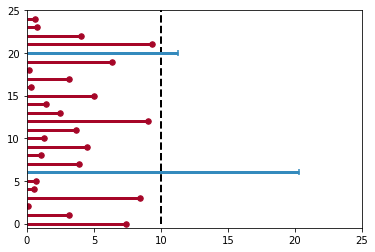

In [117]:
plt.xlim(0,25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plot_lifetimes(actual_lifetimes, event_observed=observed)

In [ ]:
#Above neglect right-censored individual
#Below doesn't 

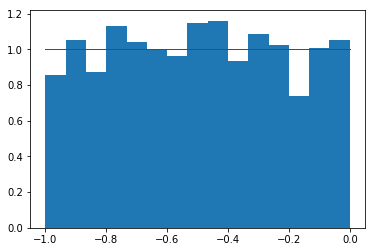

In [80]:
s = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [110]:
# exponential(2) =\ np.exp(1)
# exponential: Draw samples from an exponential distribution

In [118]:
from lifelines.datasets import load_dd
data = load_dd()

In [155]:
data.head(2)

ctryname  cowcode2  politycode un_region_name un_continent_name  \
0  Afghanistan       700       700.0  Southern Asia              Asia   
1  Afghanistan       700       700.0  Southern Asia              Asia   

                   ehead                                     leaderspellreg  \
0    Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...   
1  Sardar Mohammad Daoud  Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...   

       democracy         regime  start_year  duration  observed  
0  Non-democracy       Monarchy        1946         7         1  
1  Non-democracy  Civilian Dict        1953        10         1

In [122]:
# Other ways to estimate the survival function in lifelines are 
# BreslowFlemingHarringtonFitter, WeibullFitter, ExponentialFitter

In [134]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)
kmf.plot()

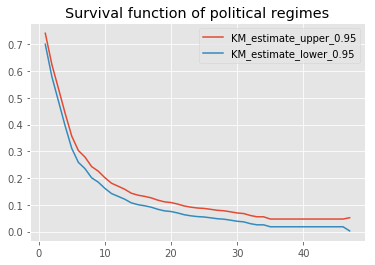

In [137]:
#kmf.survival_function_.plot()
kmf.confidence_interval_.plot()
plt.title('Survival function of political regimes');

In [140]:
plt.style.use('ggplot')
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


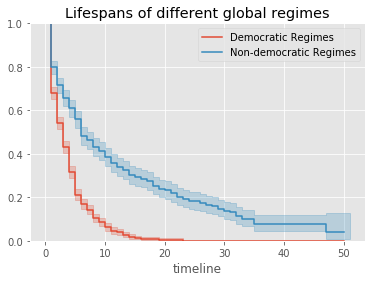

In [142]:
#spcify the datarange
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

In [143]:
from lifelines.statistics import logrank_test
results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)
results.print_summary()
## p -value == 0.0000, means two values are significantly different


df=1, alpha=0.99, null_distribution=chi squared, t_0=-1

test_statistic      p     
      260.4695 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


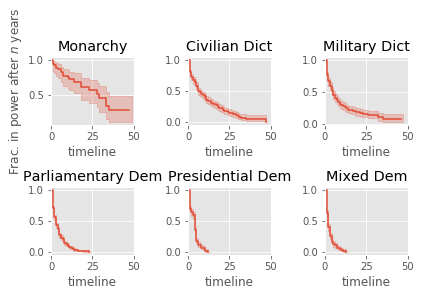

In [144]:
# comparison the different types of regimes present in the dataset:
regime_types = data['regime'].unique()t
for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

In [145]:
T = [0,3,3,2,1,2]
E = [1,1,0,0,1,1]
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 6 observations, 2 censored>

In [146]:
from lifelines.utils import datetimes_to_durations

start_date = ['2013-10-10 0:00:00', '2013-10-09', '2013-10-10']
end_date = ['2013-10-13', '2013-10-10', None]
T, E = datetimes_to_durations(start_date, end_date, fill_date='2013-10-15')
print('T (durations): ', T)
print('E (event_observed): ', E)

T (durations):  [ 3.  1.  5.]
E (event_observed):  [ True  True False]


In [147]:
from lifelines import WeibullFitter

T = data['duration']
E = data['observed']

wf = WeibullFitter()
wf.fit(T, E)
print(wf.lambda_, wf.rho_)
wf.print_summary()

0.163660178649 0.942646346687
n=1808, number of events=1468

          coef  se(coef)  lower 0.95  upper 0.95
lambda_ 0.1637    0.0046      0.1546      0.1727
rho_    0.9426    0.0180      0.9074      0.9779


          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


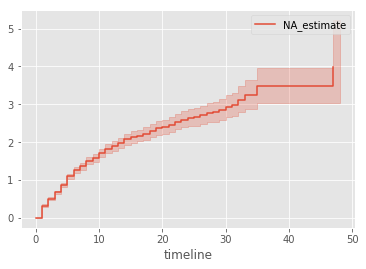

In [150]:
from lifelines import NelsonAalenFitter
T = data["duration"]
E = data["observed"]
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

print(naf.cumulative_hazard_.head())
naf.plot()

#Estimating hazard rates
#cumulative hazard with Nelson-Aalen

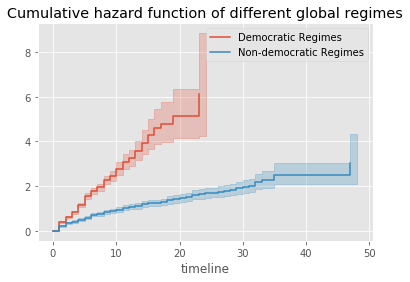

In [153]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0, 50))
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0, 50))
plt.title("Cumulative hazard function of different global regimes");

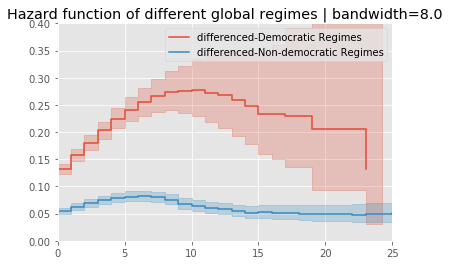

In [160]:
b = 8.
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=b)
naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=b)
plt.title("Hazard function of different global regimes | bandwidth=%.1f"%b);
plt.ylim(0, 0.4)
plt.xlim(0, 25);

In [175]:
from lifelines.datasets import load_lcd
lcd_dataset = load_lcd()
ix = lcd_dataset['group'] == 'alluvial_fan'

In [176]:
T = lcd_dataset[ix]['T']
E = lcd_dataset[ix]['C'] #boolean array, True if observed.
kmf = KaplanMeierFitter()
kmf.fit(T, E, left_censorship=True)

<lifelines.KaplanMeierFitter: fitted with 55 observations, 12 censored>

          KM_estimate
timeline             
0.0          0.087646
1.0          0.197203
2.0          0.657343
3.0          0.788811
4.0          0.854545
5.0          0.909091
7.0          0.963636
8.0          0.981818
9.0          1.000000


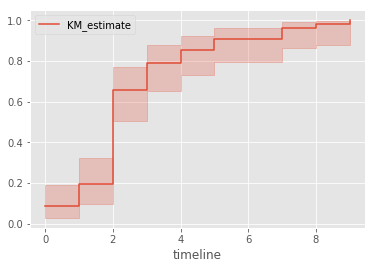

In [177]:
print(kmf.cumulative_density_)
kmf.plot() #will plot the CDF

          KM_estimate
timeline             
0.0          0.087646
1.0          0.197203
2.0          0.657343
3.0          0.788811
4.0          0.854545
5.0          0.909091
7.0          0.963636
8.0          0.981818
9.0          1.000000


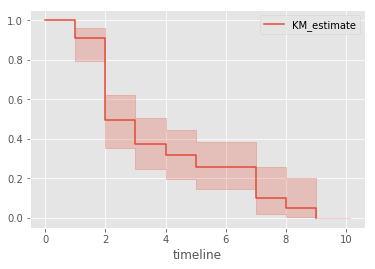

In [178]:
kmf.fit(T, E, left_censorship=False)
print(kmf.cumulative_density_)
kmf.plot() #will plot the CDF

In [188]:
## Cox proportional hazard
from lifelines.datasets import load_rossi
rossi_dataset = load_rossi()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Convergence completed after 6 iterations.


<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

In [189]:
cph.print_summary()

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1822      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640
Likelihood ratio test = 33.266 on 7 df, p=0.00002


In [181]:
rossi_dataset.head(1)

week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3

In [184]:
cph.hazards_

fin       age    race      wexp       mar      paro      prio
coef -0.379422 -0.057438  0.3139 -0.149796 -0.433704 -0.084871  0.091497

In [192]:
cph._log_likelihood

-658.74765944640319

In [195]:
cph._score_

(array([[ -2.84650988e-05,  -1.38379063e-04,   6.78109549e-06,
           9.11231378e-06,  -5.06385930e-05,   2.67908568e-05,
          -2.16129004e-04]]), 0.64032924709971351)

In [196]:
cph.score_

0.64032924709971351

In [198]:
cph._hessian_

array([[-110.83839183,   -5.61227499,   -6.68340213,    0.318173  ,
           2.22332899,    9.56309596,   -6.14698774],
       [  -5.61227499,  -64.34002947,   -1.96705492,  -28.63412231,
         -11.96979735,    7.5386115 ,    4.73863436],
       [  -6.68340213,   -1.96705492,  -99.50976304,    2.07109458,
           7.37522433,   -2.75946243,    6.79711111],
       [   0.318173  ,  -28.63412231,    2.07109458, -115.10861416,
         -20.48937279,   -7.19717208,   39.10754388],
       [   2.22332899,  -11.96979735,    7.37522433,  -20.48937279,
         -68.93409701,   -4.66060572,    2.4389922 ],
       [   9.56309596,    7.5386115 ,   -2.75946243,   -7.19717208,
          -4.66060572, -115.9513133 ,   23.2127272 ],
       [  -6.14698774,    4.73863436,    6.79711111,   39.10754388,
           2.4389922 ,   23.2127272 , -163.47089736]])

In [201]:
#X = rossi_dataset.drop(["week", "arrest"], axis=1)
#cph.predict_partial_hazard(X)
#cph.predict_survival_function(X)

0         1         2         3         4         5    \
event_at                                                               
0.0       1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1.0       0.997616  0.993695  0.994083  0.999045  0.997626  0.997578   
2.0       0.995230  0.987411  0.988183  0.998089  0.995250  0.995154   
3.0       0.992848  0.981162  0.982314  0.997133  0.992878  0.992734   
4.0       0.990468  0.974941  0.976468  0.996176  0.990507  0.990316   
5.0       0.988085  0.968739  0.970639  0.995216  0.988135  0.987895   
6.0       0.985699  0.962552  0.964820  0.994254  0.985758  0.985471   
7.0       0.983305  0.956370  0.959004  0.993287  0.983374  0.983039   
8.0       0.971402  0.926001  0.930402  0.988460  0.971520  0.970950   
9.0       0.966614  0.913958  0.919043  0.986508  0.966752  0.966089   
10.0      0.964223  0.907978  0.913399  0.985531  0.964370  0.963660   
11.0      0.959411  0.896023  0.902109  0.983560  0.959577  0.958774   
12.0      0.954529  0.883991  0.890739  0.981555  0.954715  0.953817   
13.0      0.952091  0.878023  0.885094  0.980551  0.952287  0.951343   
14.0      0.944785  0.860283  0.868304  0.977534  0.945010  0.943926   
15.0      0.939883  0.848506  0.857145  0.975502  0.940127  0.938950   
16.0      0.934978  0.836824  0.846067  0.973462  0.935241  0.933972   
17.0      0.927644  0.819543  0.829662  0.970400  0.927935  0.926528   
18.0      0.920239  0.802323  0.813294  0.967294  0.920559  0.919014   
19.0      0.915280  0.790918  0.802441  0.965205  0.915619  0.913983   
20.0      0.902910  0.762911  0.775749  0.959965  0.903296  0.901434   
21.0      0.897956  0.751869  0.765209  0.957855  0.898360  0.896409   
22.0      0.895478  0.746385  0.759970  0.956797  0.895892  0.893896   
23.0      0.892994  0.740910  0.754738  0.955734  0.893417  0.891376   
24.0      0.883110  0.719381  0.734141  0.951488  0.883570  0.881354   
25.0      0.875711  0.703521  0.718943  0.948291  0.876198  0.873851   
26.0      0.868213  0.687672  0.703735  0.945034  0.868726  0.866249   
27.0      0.863219  0.677241  0.693713  0.942855  0.863750  0.861187   
28.0      0.858226  0.666911  0.683781  0.940670  0.858775  0.856127   
30.0      0.853213  0.656638  0.673893  0.938468  0.853780  0.851046   
31.0      0.850700  0.651527  0.668969  0.937361  0.851276  0.848499   
32.0      0.845672  0.641374  0.659183  0.935141  0.846266  0.843405   
33.0      0.840638  0.631308  0.649471  0.932910  0.841249  0.838304   
34.0      0.835564  0.621261  0.639767  0.930653  0.836193  0.833163   
35.0      0.825421  0.601478  0.620632  0.926117  0.826084  0.822888   
36.0      0.817800  0.586875  0.606483  0.922687  0.818489  0.815169   
37.0      0.807650  0.567773  0.587941  0.918089  0.808372  0.804891   
38.0      0.805099  0.563033  0.583333  0.916927  0.805829  0.802308   
39.0      0.799999  0.553632  0.574190  0.914599  0.800746  0.797144   
40.0      0.789848  0.535214  0.556247  0.909939  0.790629  0.786869   
42.0      0.784733  0.526079  0.547334  0.907577  0.785530  0.781692   
43.0      0.774567  0.508214  0.529874  0.902855  0.775396  0.771404   
44.0      0.769460  0.499383  0.521230  0.900469  0.770304  0.766237   
45.0      0.764349  0.490641  0.512664  0.898071  0.765209  0.761066   
46.0      0.754116  0.473429  0.495770  0.893242  0.755007  0.750715   
47.0      0.751552  0.469176  0.491589  0.892026  0.752451  0.748121   
48.0      0.746427  0.460745  0.483296  0.889587  0.747341  0.742938   
49.0      0.733641  0.440128  0.462975  0.883460  0.734592  0.730010   
50.0      0.725969  0.428037  0.451031  0.879752  0.726942  0.722254   
52.0      0.715699  0.412181  0.435335  0.874752  0.716702  0.711875   

               6         7         8         9      ...          422  \
event_at                                            ...                
0.0       1.000000  1.000000  1.000000  1.000000    ...     1.000000   
1.0       0.998865  0.997827  0.995453  0.997462    ..